### Basic Code For Linear Regression
This is for multivariable Linear Regression
We have homeprices for many homes with multiple features which we need to include in model

In [94]:
## Importing 'them libs'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [95]:
# Accessing the basic CSV file for linear regression
data = pd.read_csv('DataSets/homeprices_multi-varaible.csv')
data

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [96]:
data.bedrooms = data.bedrooms.fillna(data.bedrooms.mean())
data

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.2,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [97]:
# Basic Linear Model calling
Regressor = linear_model.LinearRegression()
Regressor.fit(data.drop('price',axis=1),data.price)

LinearRegression()

In [98]:
Regressor.predict([[3300,4,22]])

array([610754.00226644])

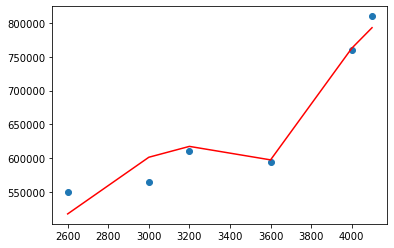

In [103]:
plt.scatter(data.area,data.price)
plt.plot(data.area,Regressor.predict(data.drop('price',axis=1)),color='red')
plt.show()
# A werid fit but it is the data itself
# The thing is nt linear because of the skewed datasets...what to do

#### Some Basic HomeWork Problem
The File 'hiring.csv',contains hiring statics for a firm such as experience of candi-date, his written test score and personal interview score. Based on these 3 factors, HR will decide the salary. Given this data, you need to build a machine learning model for HR department that c-an help them decide salaries for future candidates

1. 2 yr experience, 9 test score, 6 interview score. 
2. 3 yr experience, 10 test score, 10 interview score

In [71]:
homedata = pd.read_csv('Datasets/hiring.csv')
homedata.experience= homedata.experience.fillna('zero')
homedata['test_score(out of 10)'] = homedata['test_score(out of 10)'].fillna(homedata['test_score(out of 10)'].mean())
homedata

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.000000,9,50000
1,zero,8.000000,6,45000
2,five,6.000000,7,60000
3,two,10.000000,10,65000
4,seven,9.000000,6,70000
5,three,7.000000,10,62000
6,ten,7.857143,7,72000
7,eleven,7.000000,8,80000


In [72]:
#Importing a new library to replce words with numbers
from word2number import w2n
homedata.experience = homedata.experience.apply(w2n.word_to_num)
homedata

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.000000,9,50000
1,0,8.000000,6,45000
2,5,6.000000,7,60000
3,2,10.000000,10,65000
4,7,9.000000,6,70000
5,3,7.000000,10,62000
6,10,7.857143,7,72000
7,11,7.000000,8,80000


In [73]:
Regressor.fit(homedata.drop('salary($)',axis=1),homedata['salary($)'])

LinearRegression()

In [76]:
input2check = ([2,9,6],[3,10,10])
Regressor.predict(input2check)

array([53290.89255945, 66819.36588954])

#### Problem Solved!!

### One Hot Encoding with Dummy Variables
Also should learn how to avoid the dummy variable trap

In [81]:
da1 = pd.read_csv("DataSets/homeprices-extra.csv")
da1

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [84]:
dum_var = pd.get_dummies(da1.town)
merged = pd.concat([da1,dum_var],axis='columns').drop(['town'],axis='columns')
merged

,area,price,monroe township,robinsville,west windsor
0,2600,550000,1,0,0
1,3000,565000,1,0,0
2,3200,610000,1,0,0
3,3600,680000,1,0,0
4,4000,725000,1,0,0
5,2600,585000,0,0,1
6,2800,615000,0,0,1
7,3300,650000,0,0,1
8,3600,710000,0,0,1
9,2600,575000,0,1,0


In [87]:
fin = merged.drop(['west windsor'],axis=1)  #This is for stopping the dummy trap variable
X = fin.drop('price',axis=1)
Y = fin.price

In [88]:
Regressor2 = linear_model.LinearRegression()
Regressor2.fit(X,Y)

LinearRegression()

In [109]:
inp = [[3400,0,0],[2800,0,1]]
y = Regressor2.predict(inp)
print("The predicted values for inputs x and y are",y[0],'dollars and',y[1],'dollars')
#Ofcourse the value is in dollars, we won't get even a scooty for 50,000 rupees xD.

The predicted values for inputs x and y are 681241.6684583914 dollars and 590775.639647394 dollars
